In [12]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [13]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [14]:
sales = read_csv('C:\Shreyash\Data Science\Assignments\ML and Stats - All Assigments\sales-of-shampoo-over-a-three-ye.csv',index_col =0)

In [15]:
sales

,Sales of shampoo over a three year period,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
Month,,,,,,,,,
01-Jan,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Feb,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Mar,183.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Apr,119.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-May,180.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Jun,168.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Jul,231.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Aug,224.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-Sep,192.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sales1=sales.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1)

In [17]:
sales1

,Sales of shampoo over a three year period
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3
01-Jun,168.5
01-Jul,231.8
01-Aug,224.5
01-Sep,192.8


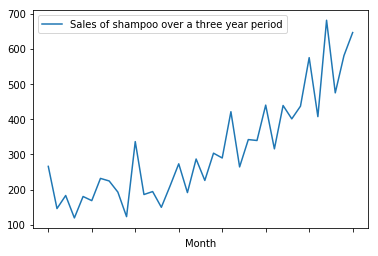

In [18]:
sales1.plot()

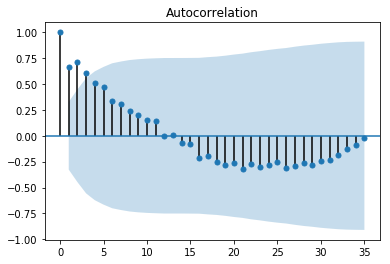

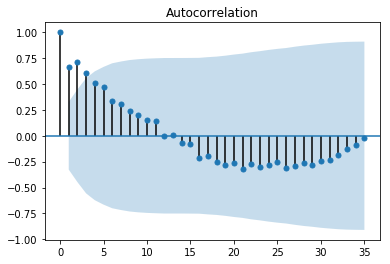

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales1)

In [21]:
sales1.head()

,Sales of shampoo over a three year period
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


In [22]:
sales1.shift(1)

,Sales of shampoo over a three year period
Month,
01-Jan,NaN
01-Feb,266.0
01-Mar,145.9
01-Apr,183.1
01-May,119.3
01-Jun,180.3
01-Jul,168.5
01-Aug,231.8
01-Sep,224.5


In [23]:
sales_diff = sales1.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [24]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales of shampoo over a three year period
Month,
01-Feb,-120.1
01-Mar,37.2
01-Apr,-63.8
01-May,61.0
01-Jun,-11.8


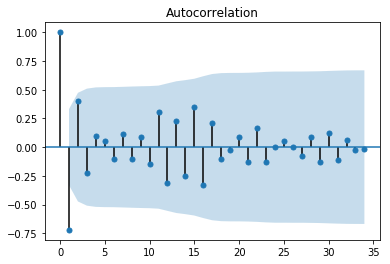

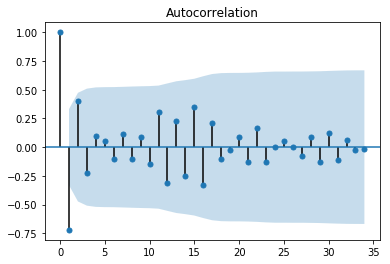

In [25]:
plot_acf(sales_diff)

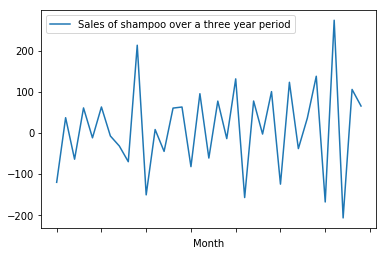

In [26]:
sales_diff.plot()

In [28]:
X = sales1.values
train = X[0:28] # 27 data as train data
test = X[28:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


In [ ]:
## ARIMA model

In [30]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [31]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.09040511436183
(0, 0, 1) 334.3872829957554
(0, 0, 2) 329.31881164853866
(0, 0, 3) 330.92416191319046
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 324.4220452613395
(0, 1, 1) 308.0017050784539
(0, 1, 2) 306.7698573618047
(0, 2, 0) 343.4502397203673
(0, 2, 1) 318.26218827679946
(1, 0, 0) 330.89180942559716
(1, 0, 1) 325.63339493771554
(1, 0, 2) 322.452435784985
(1, 0, 4) 324.2380212596486
(1, 1, 0) 309.1188767752589
(1, 1, 1) 306.79093608908283
(1, 1, 2) 306.91086651444687
(1, 1, 3) 311.8713030852165
(1, 1, 4) 309.119460681394
(1, 1, 5) 314.62738257876856
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.2885462718525
(1, 2, 4) 301.8424351037566
(2, 0, 0) 322.09349459126526
(2, 0, 1) 332.6125126521117
(2, 1, 0) 310.4797159942327
(2, 1, 1) 308.67508697382726
(2, 1, 4) 310.73924673717534
(2, 1, 5) 309.2613029479653
(2, 2, 0) 317.24389670047566
(2, 2, 1) 305.7053644719475
(2, 2, 3) 301.9734154335286
(3, 0, 0) 324.0564894639567
(3, 1, 0) 305.21331482411324
(3, 1, 1) 306.4702994791246
(3, 1, 

In [32]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

298.7706871607531


In [33]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([334.25602577, 464.32659025, 426.09490955, 496.34479871,
       443.78979395, 500.24046746, 504.44730005, 564.70607074])

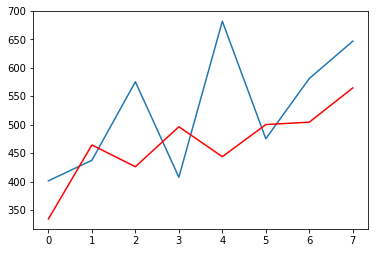

In [34]:
plt.plot(test)
plt.plot(predictions, color='red')

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

13180.72059677319